In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys

operating_system = 'mac'

if operating_system == 'win':
    os.chdir('C:/Users/fabau/OneDrive/Documents/GitHub/master-project-cleaned/')
elif operating_system == 'curnagl':
    os.chdir('/work/FAC/FGSE/IDYST/tbeucler/default/fabien/repos/cleaner_version/')
else:
    os.chdir('/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/')

util_perso = os.path.abspath('util/gev')
sys.path.append(util_perso)
util_perso = os.path.abspath('util/processing')
sys.path.append(util_perso)

import time_series
from data_processing import depickle

In [26]:
loading_train = []
loading_valid = []
loading_test = []
for var in var_selected['var_name']:

    pcn = var_selected[var_selected['var_name']==var]['PC'].values[0]
    print(var)

    temp_loading_allpcn_train = pcs0_train[var][:]
    temp_loading_seppcn_train = temp_loading_allpcn_train[:,pcn]
    loading_train.append(temp_loading_seppcn_train)

    temp_loading_allpcn_valid = pcs0_valid[var][:]
    temp_loading_seppcn_valid = temp_loading_allpcn_valid[:,pcn]
    loading_valid.append(temp_loading_seppcn_valid)

    temp_loading_allpcn_test = pcs0_test[var][:]
    temp_loading_seppcn_test = temp_loading_allpcn_test[:,pcn]
    loading_test.append(temp_loading_seppcn_test)

loading_train = np.array(loading_train)
loading_train = pd.DataFrame(loading_train, 
                             index=var_selected['var_name_pca'],
                             columns=train_sets)
loading_valid = np.array(loading_valid)
loading_valid = pd.DataFrame(loading_valid, 
                             index=var_selected['var_name_pca'],
                             columns=val_sets)
loading_test = np.array(loading_test)
loading_test = pd.DataFrame(loading_test, 
                            index=var_selected['var_name_pca'],
                            columns=test_number)

loadings_train_valid = pd.concat([loading_train, loading_valid], axis=1)

loadings_train_valid = loadings_train_valid.rename(columns=train_valid)

loadings_all = pd.concat([loadings_train_valid, loading_test], axis=1)


2m_temperature_std
geopotential_500_max
relative_humidity_975_mean
total_precipitation_std
relative_humidity_900_min
relative_humidity_850_min
100m_magnitude_of_wind_mean
relative_humidity_700_std
relative_humidity_100_max
relative_humidity_500_max
relative_humidity_50_std
mean_surface_net_long_wave_radiation_flux_mean
relative_humidity_50_mean
k_index_min
relative_humidity_70_std
k_index_max
high_cloud_cover_std
mean_sea_level_pressure_mean
relative_humidity_800_mean
convective_available_potential_energy_mean
relative_humidity_400_mean
mean_surface_net_short_wave_radiation_flux_std
relative_humidity_700_max
relative_humidity_200_std
mean_surface_latent_heat_flux_min
total_totals_index_std
total_totals_index_max


In [2]:
final = '_final'

pcaall = depickle(f'analysis_loadings_selected/PCA_fred{final}/pcaall.pkl')

pcsall_train = depickle(f'analysis_loadings_selected/PCA_fred{final}/pcsall_train.pkl')
pcsall_test = depickle(f'analysis_loadings_selected/PCA_fred{final}/pcsall_test.pkl')
pcsall_valid = depickle(f'analysis_loadings_selected/PCA_fred{final}/pcsall_valid.pkl')

# the storm number linked to the index
train_number = pd.read_csv('ml_scripts/new_feature_selection/seed_42/X_train_ts_all.csv')['storm_index']
valid_number = pd.read_csv('ml_scripts/new_feature_selection/seed_42/X_validation_ts_all.csv')['storm_index']
test_number = pd.read_csv('ml_scripts/new_feature_selection/seed_42/X_test_ts_all.csv')['storm_index']

train_valid = pd.concat([train_number, valid_number], axis=0).reset_index(drop=True)

# loadings on the train set, validation set and test set
train_sets = depickle(f'analysis_loadings_selected/PCA_fred{final}/train_sets.pkl')[0]
val_sets = depickle(f'analysis_loadings_selected/PCA_fred{final}/val_sets.pkl')[0]

pcs0_train = pcsall_train[0]
pcs0_valid = pcsall_valid[0]
pcs0_test = pcsall_test[0]

output_type = ['max']#, 'max']

for out in output_type:
    if out == 'max':
        folder = f'u_gust{final}'
    else:
        folder = f'z_gust{final}'

    var_selected = features = pd.DataFrame(depickle(f'analysis_loadings_selected/{folder}/best_linear_{out}_feature.pkl'),
                        columns = ['var_name', 'PC'])
    var_selected ['var_name_pca'] = var_selected ['var_name']+ '_PC'+ var_selected ['PC'].astype(str)

    loading_train = []
    loading_valid = []
    loading_test = []

    eigenvectors = {}

    for var in var_selected['var_name']:

        pcn = var_selected[var_selected['var_name']==var]['PC'].values[0]
        print(var)

        # combine all loadings for the selected variables in one dataframe with the variable names as index and the storm number as columns
        temp_loading_allpcn_train = pcs0_train[var][:]
        temp_loading_seppcn_train = temp_loading_allpcn_train[:,pcn]
        loading_train.append(temp_loading_seppcn_train)

        temp_loading_allpcn_valid = pcs0_valid[var][:]
        temp_loading_seppcn_valid = temp_loading_allpcn_valid[:,pcn]
        loading_valid.append(temp_loading_seppcn_valid)

        temp_loading_allpcn_test = pcs0_test[var][:]
        temp_loading_seppcn_test = temp_loading_allpcn_test[:,pcn]
        loading_test.append(temp_loading_seppcn_test)

        # extract the scores from pcaall
        scores = {}  # dictionary to store dataframes

        #if  var.startswith('10m_'):
        #    continue
        #if var.startswith('mean_sea_level_pressure_min'):
        #    continue
        #loadings[var] = pd.read_csv(f'data/PCA/PCA_loadings_1000/{var}.csv')#.drop(columns=['variable'])
        eigenvectors[var] = pcaall[var].components_[pcn,:] # or vector
        #explained_variance_10 = pcaall[var].explained_variance_[:10] # or value
        #loadings[var] = pd.DataFrame(loadings_10, columns=[f'PCA_{i+1}' for i in range(10)])
        #scores[var] = pd.read_csv(f'data/PCA/PCA_scores_1000/{var}.csv').drop(columns=['variable'])

loading_train = np.array(loading_train)
loading_train = pd.DataFrame(loading_train, 
                            index=var_selected['var_name_pca'],
                            columns=train_sets)
loading_valid = np.array(loading_valid)
loading_valid = pd.DataFrame(loading_valid, 
                            index=var_selected['var_name_pca'],
                            columns=val_sets)
loading_test = np.array(loading_test)
loading_test = pd.DataFrame(loading_test, 
                            index=var_selected['var_name_pca'],
                            columns=test_number)

loadings_train_valid = pd.concat([loading_train, loading_valid], axis=1)

loadings_train_valid = loadings_train_valid.rename(columns=train_valid)

loadings_all = pd.concat([loadings_train_valid, loading_test], axis=1).T

/Users/fabienaugsburger/anaconda3/envs/master/lib/python3.11/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.3.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


relative_humidity_20_min
geopotential_500_min
100m_magnitude_of_wind_min
10m_orientation_of_wind_std
2m_temperature_min
2m_temperature_max
relative_humidity_50_std
2m_dewpoint_temperature_std
relative_humidity_1000_mean
relative_humidity_950_min
relative_humidity_70_max
mean_top_net_long_wave_radiation_flux_std
relative_humidity_1000_std
relative_humidity_925_max
relative_humidity_600_max
relative_humidity_200_min
mean_top_net_short_wave_radiation_flux_min
mean_total_precipitation_rate_std
mean_surface_net_short_wave_radiation_flux_max
relative_humidity_600_mean
mean_top_net_long_wave_radiation_flux_max
high_cloud_cover_std
relative_humidity_100_std


### Shape of the scores

/var/folders/01/5ryz4pnn581dj9gk6r1nn5qr0000gn/T/ipykernel_3162/3202794770.py:3: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  pc_n = int(var_selected[var_selected['var_name'] == var]['PC'])+1
/var/folders/01/5ryz4pnn581dj9gk6r1nn5qr0000gn/T/ipykernel_3162/3202794770.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(np.arange(-5,40,5))


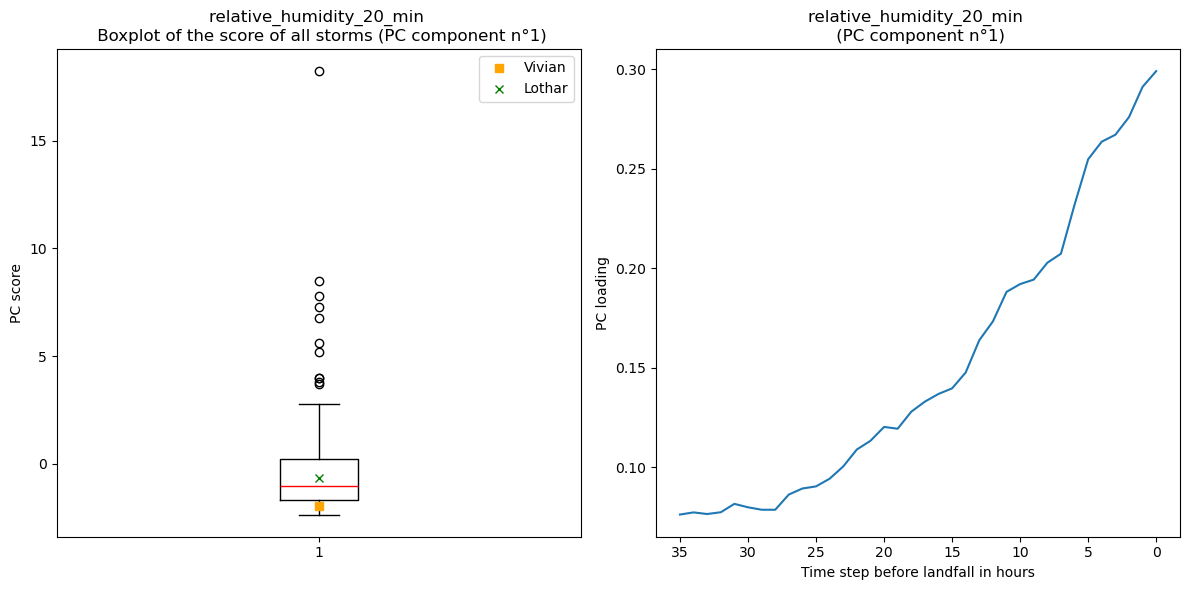

/var/folders/01/5ryz4pnn581dj9gk6r1nn5qr0000gn/T/ipykernel_3162/3202794770.py:3: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  pc_n = int(var_selected[var_selected['var_name'] == var]['PC'])+1
/var/folders/01/5ryz4pnn581dj9gk6r1nn5qr0000gn/T/ipykernel_3162/3202794770.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(np.arange(-5,40,5))


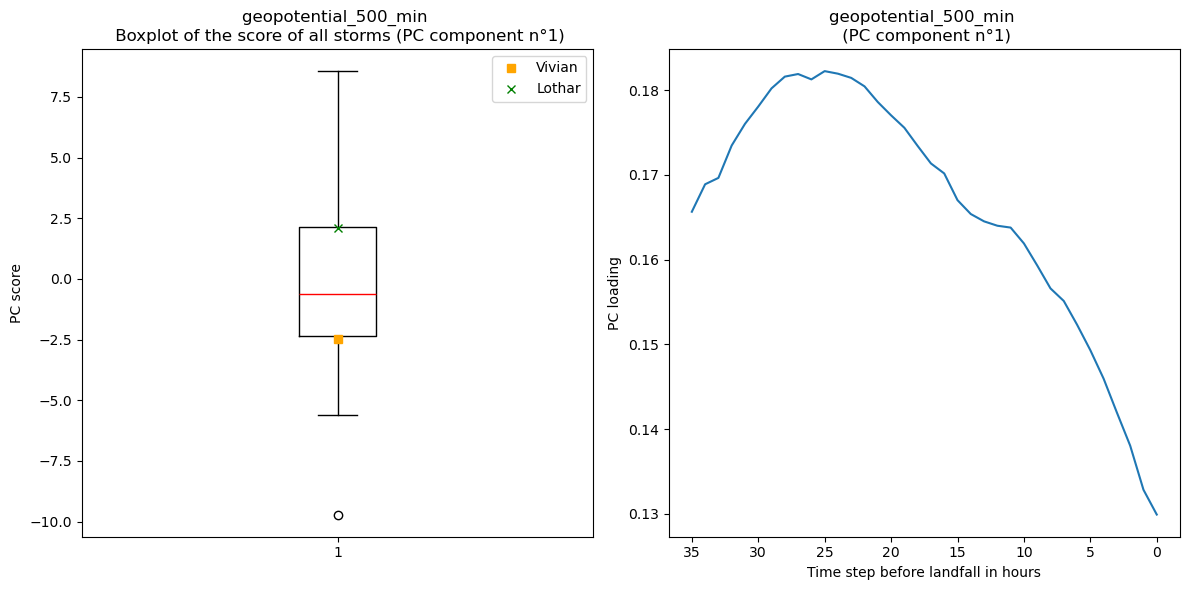

/var/folders/01/5ryz4pnn581dj9gk6r1nn5qr0000gn/T/ipykernel_3162/3202794770.py:3: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  pc_n = int(var_selected[var_selected['var_name'] == var]['PC'])+1
/var/folders/01/5ryz4pnn581dj9gk6r1nn5qr0000gn/T/ipykernel_3162/3202794770.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(np.arange(-5,40,5))


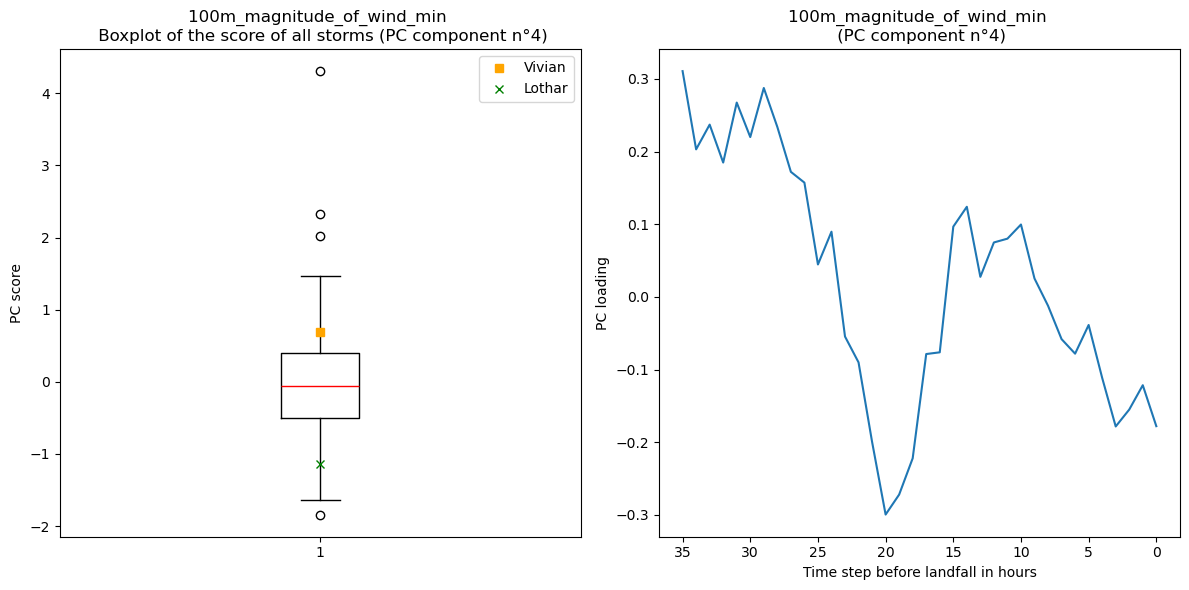

/var/folders/01/5ryz4pnn581dj9gk6r1nn5qr0000gn/T/ipykernel_3162/3202794770.py:3: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  pc_n = int(var_selected[var_selected['var_name'] == var]['PC'])+1
/var/folders/01/5ryz4pnn581dj9gk6r1nn5qr0000gn/T/ipykernel_3162/3202794770.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(np.arange(-5,40,5))


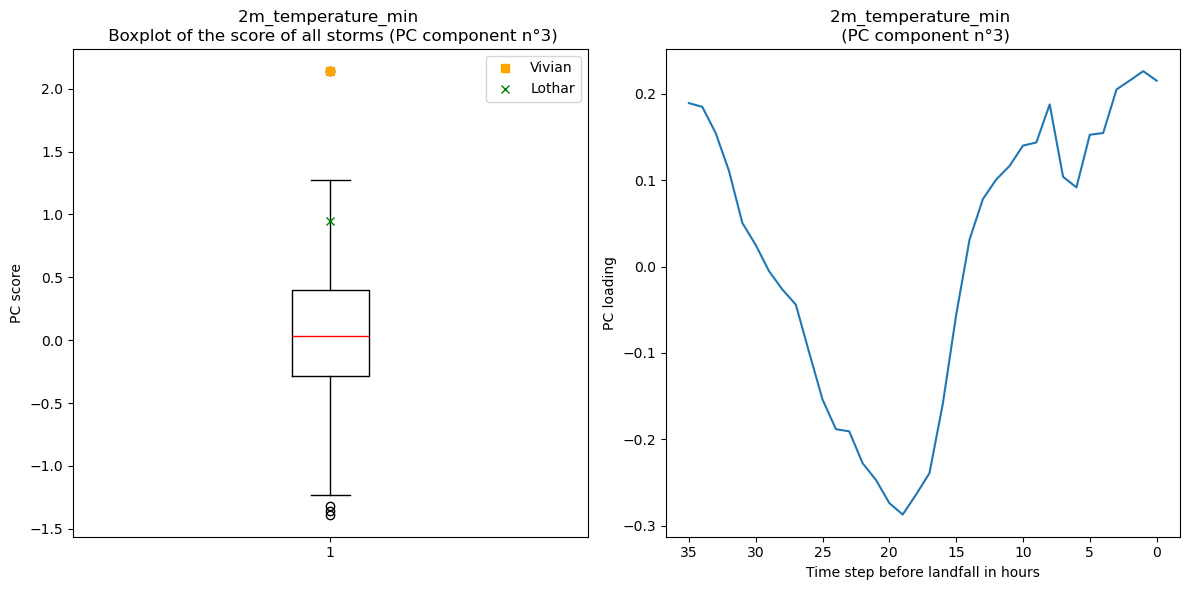

/var/folders/01/5ryz4pnn581dj9gk6r1nn5qr0000gn/T/ipykernel_3162/3202794770.py:3: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  pc_n = int(var_selected[var_selected['var_name'] == var]['PC'])+1
/var/folders/01/5ryz4pnn581dj9gk6r1nn5qr0000gn/T/ipykernel_3162/3202794770.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(np.arange(-5,40,5))


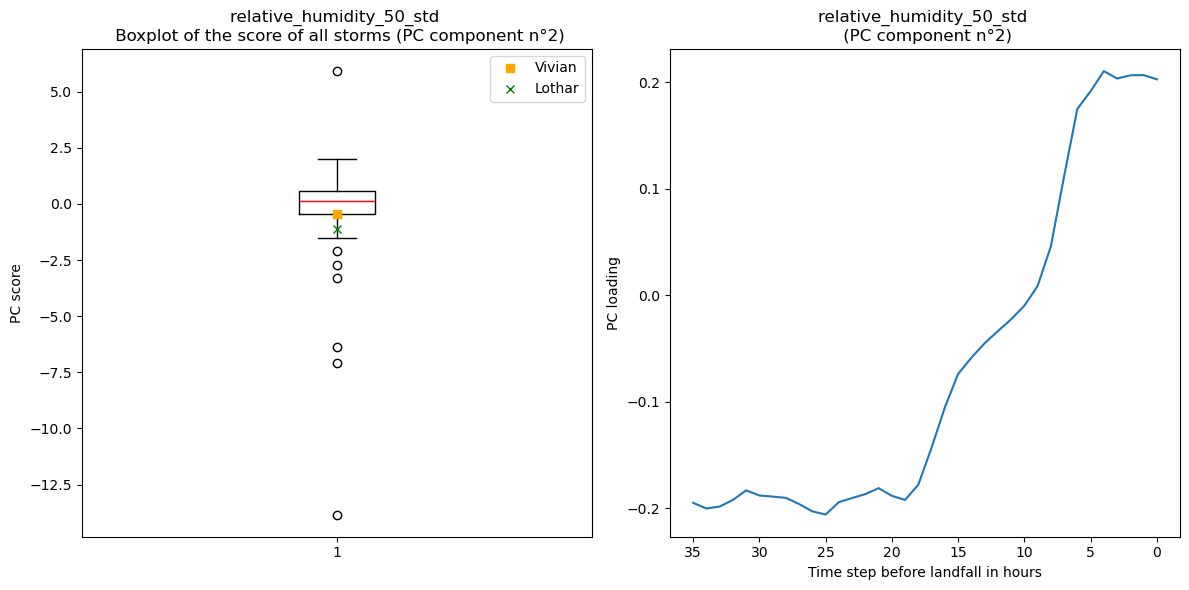

/var/folders/01/5ryz4pnn581dj9gk6r1nn5qr0000gn/T/ipykernel_3162/3202794770.py:3: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  pc_n = int(var_selected[var_selected['var_name'] == var]['PC'])+1
/var/folders/01/5ryz4pnn581dj9gk6r1nn5qr0000gn/T/ipykernel_3162/3202794770.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(np.arange(-5,40,5))


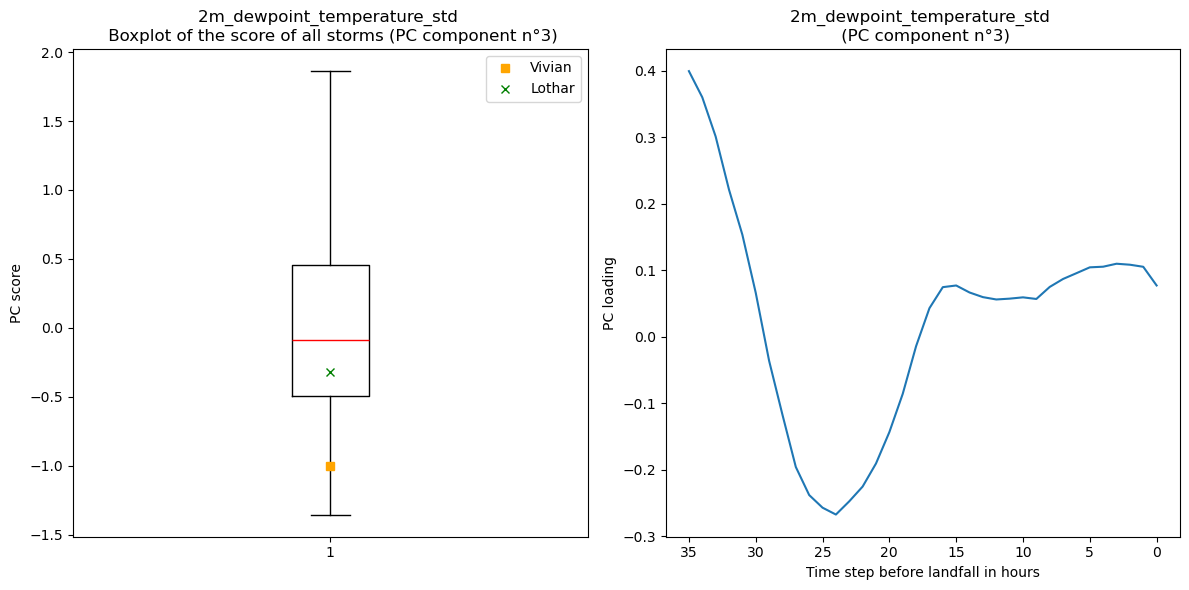

/var/folders/01/5ryz4pnn581dj9gk6r1nn5qr0000gn/T/ipykernel_3162/3202794770.py:3: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  pc_n = int(var_selected[var_selected['var_name'] == var]['PC'])+1
/var/folders/01/5ryz4pnn581dj9gk6r1nn5qr0000gn/T/ipykernel_3162/3202794770.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(np.arange(-5,40,5))


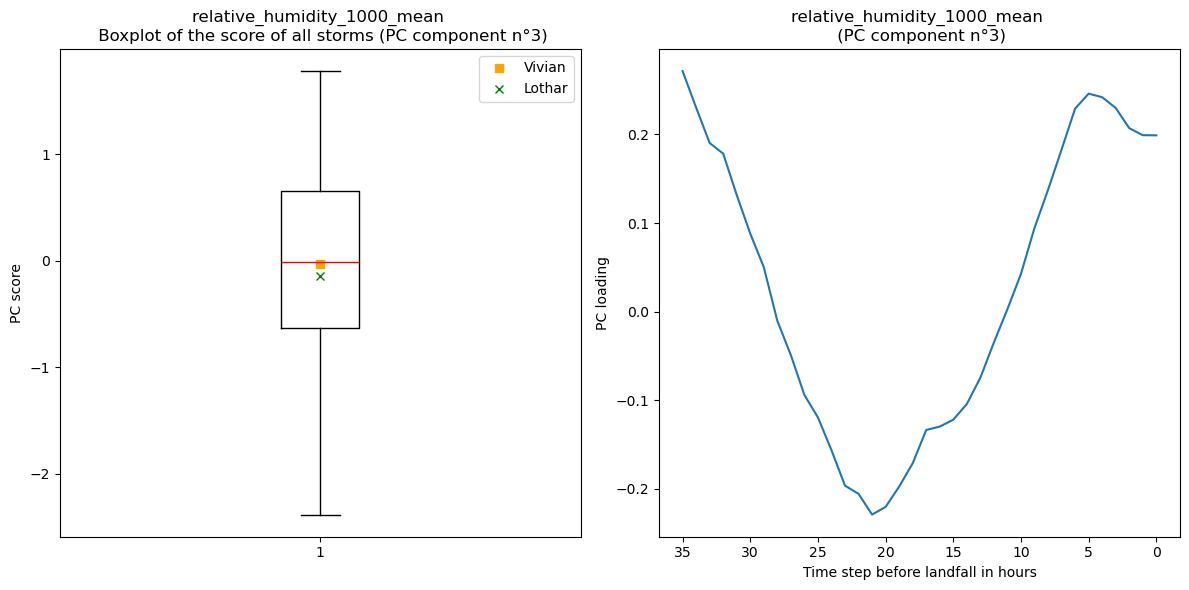

/var/folders/01/5ryz4pnn581dj9gk6r1nn5qr0000gn/T/ipykernel_3162/3202794770.py:3: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  pc_n = int(var_selected[var_selected['var_name'] == var]['PC'])+1
/var/folders/01/5ryz4pnn581dj9gk6r1nn5qr0000gn/T/ipykernel_3162/3202794770.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(np.arange(-5,40,5))


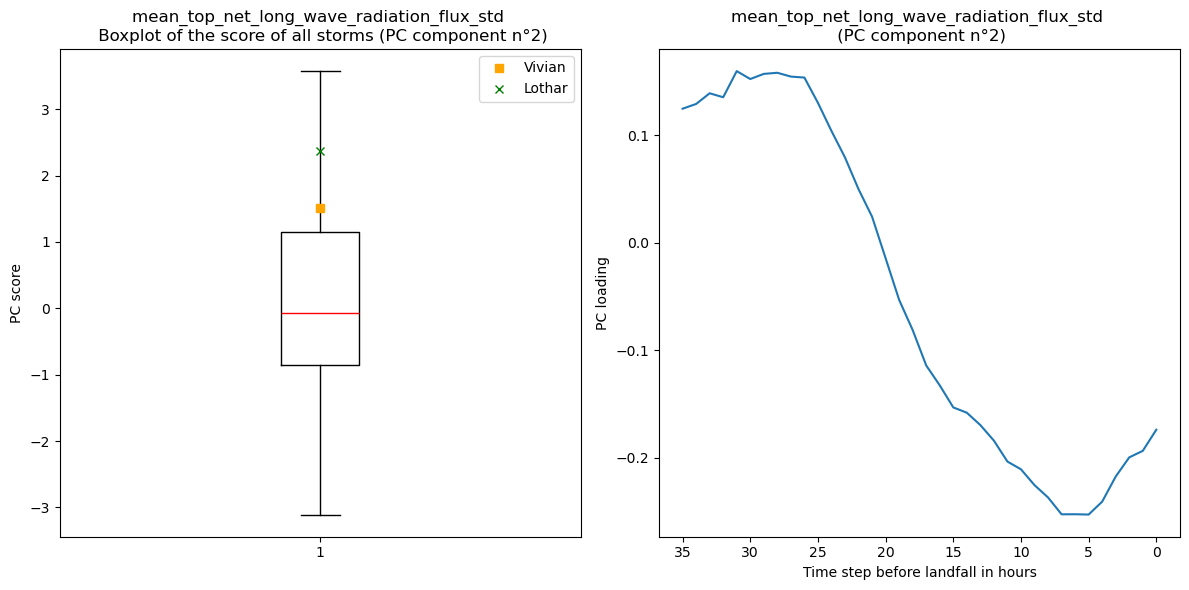

/var/folders/01/5ryz4pnn581dj9gk6r1nn5qr0000gn/T/ipykernel_3162/3202794770.py:3: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  pc_n = int(var_selected[var_selected['var_name'] == var]['PC'])+1
/var/folders/01/5ryz4pnn581dj9gk6r1nn5qr0000gn/T/ipykernel_3162/3202794770.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(np.arange(-5,40,5))


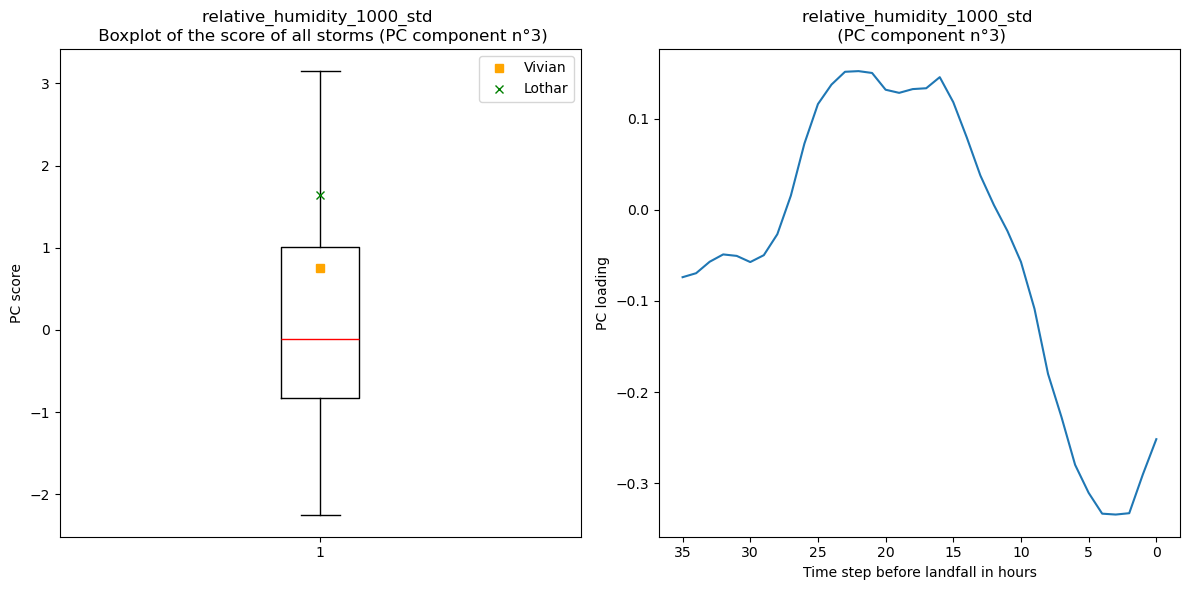

/var/folders/01/5ryz4pnn581dj9gk6r1nn5qr0000gn/T/ipykernel_3162/3202794770.py:3: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  pc_n = int(var_selected[var_selected['var_name'] == var]['PC'])+1
/var/folders/01/5ryz4pnn581dj9gk6r1nn5qr0000gn/T/ipykernel_3162/3202794770.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(np.arange(-5,40,5))


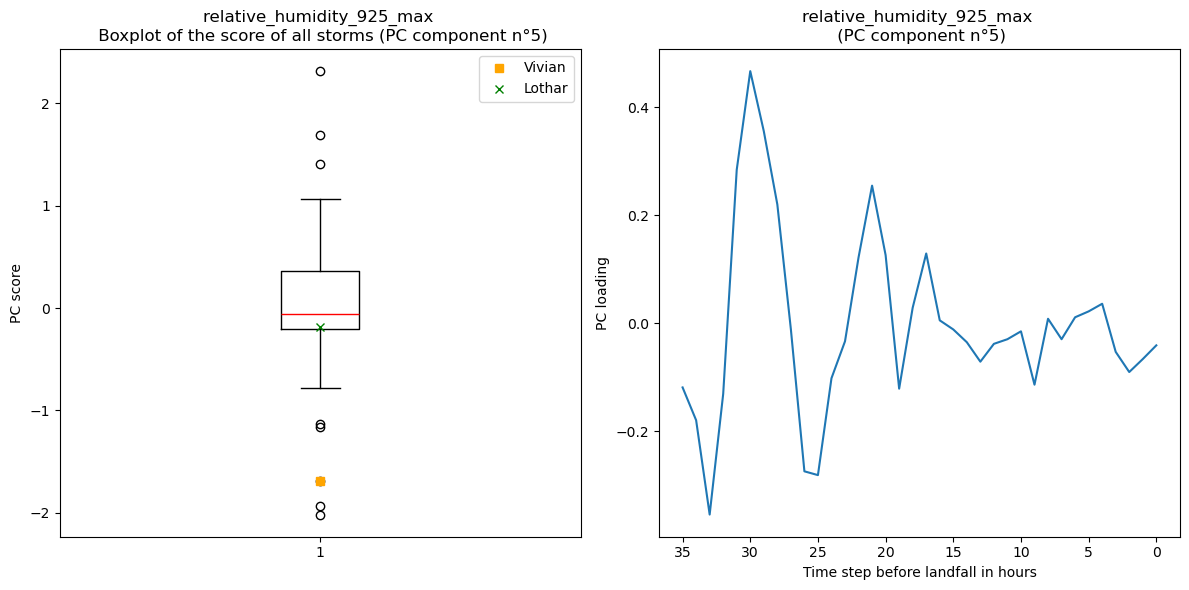

/var/folders/01/5ryz4pnn581dj9gk6r1nn5qr0000gn/T/ipykernel_3162/3202794770.py:3: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  pc_n = int(var_selected[var_selected['var_name'] == var]['PC'])+1
/var/folders/01/5ryz4pnn581dj9gk6r1nn5qr0000gn/T/ipykernel_3162/3202794770.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(np.arange(-5,40,5))


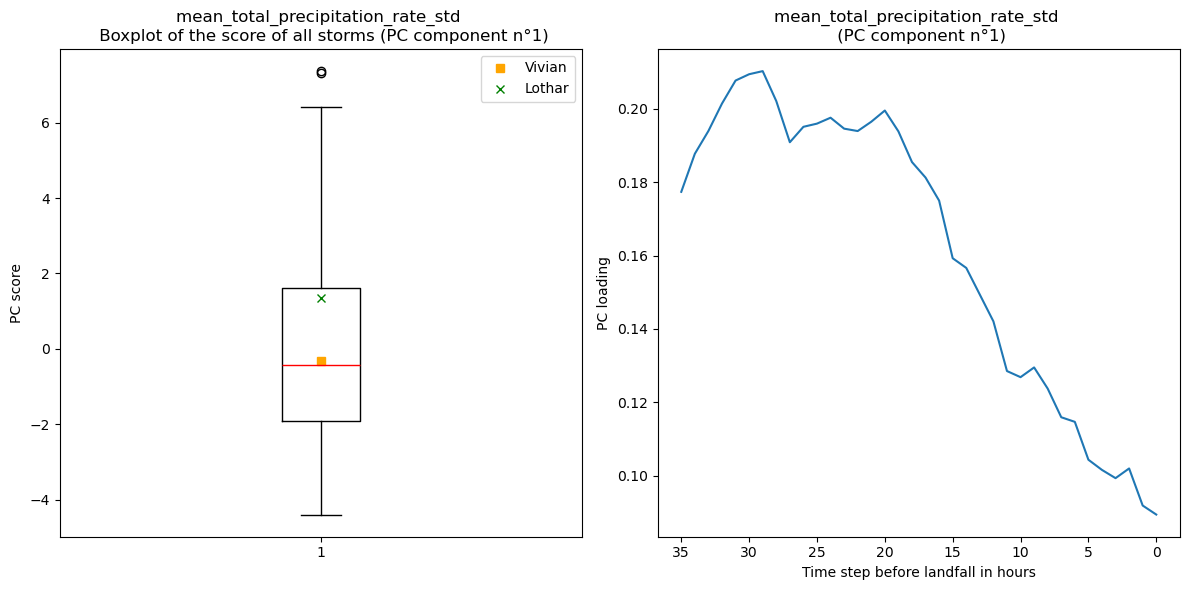

/var/folders/01/5ryz4pnn581dj9gk6r1nn5qr0000gn/T/ipykernel_3162/3202794770.py:3: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  pc_n = int(var_selected[var_selected['var_name'] == var]['PC'])+1
/var/folders/01/5ryz4pnn581dj9gk6r1nn5qr0000gn/T/ipykernel_3162/3202794770.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(np.arange(-5,40,5))


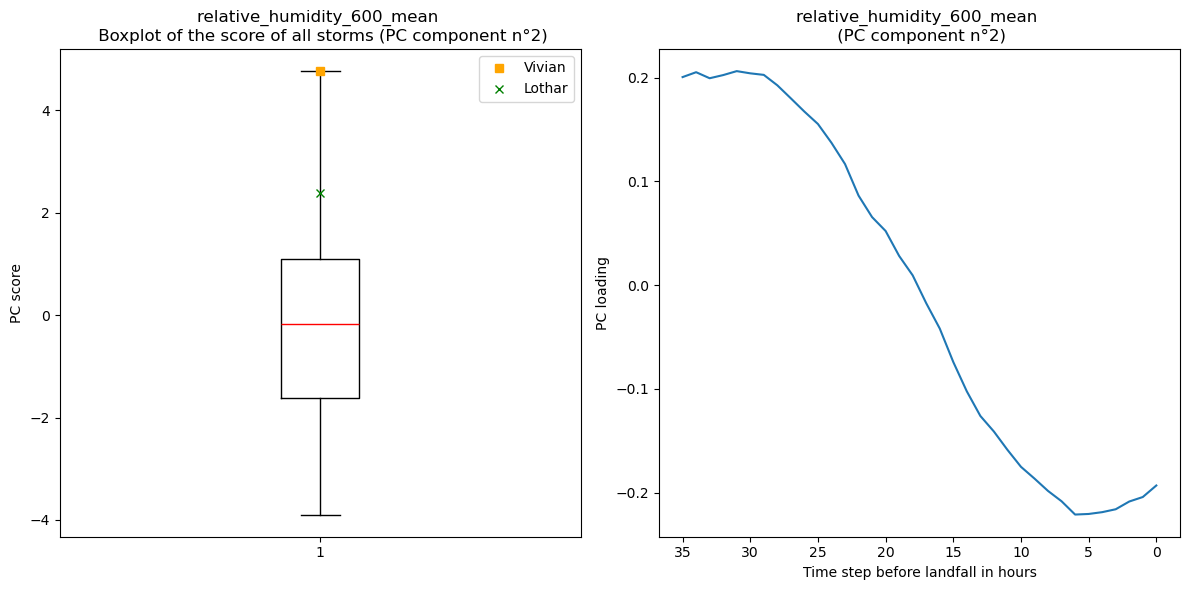

/var/folders/01/5ryz4pnn581dj9gk6r1nn5qr0000gn/T/ipykernel_3162/3202794770.py:3: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  pc_n = int(var_selected[var_selected['var_name'] == var]['PC'])+1
/var/folders/01/5ryz4pnn581dj9gk6r1nn5qr0000gn/T/ipykernel_3162/3202794770.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(np.arange(-5,40,5))


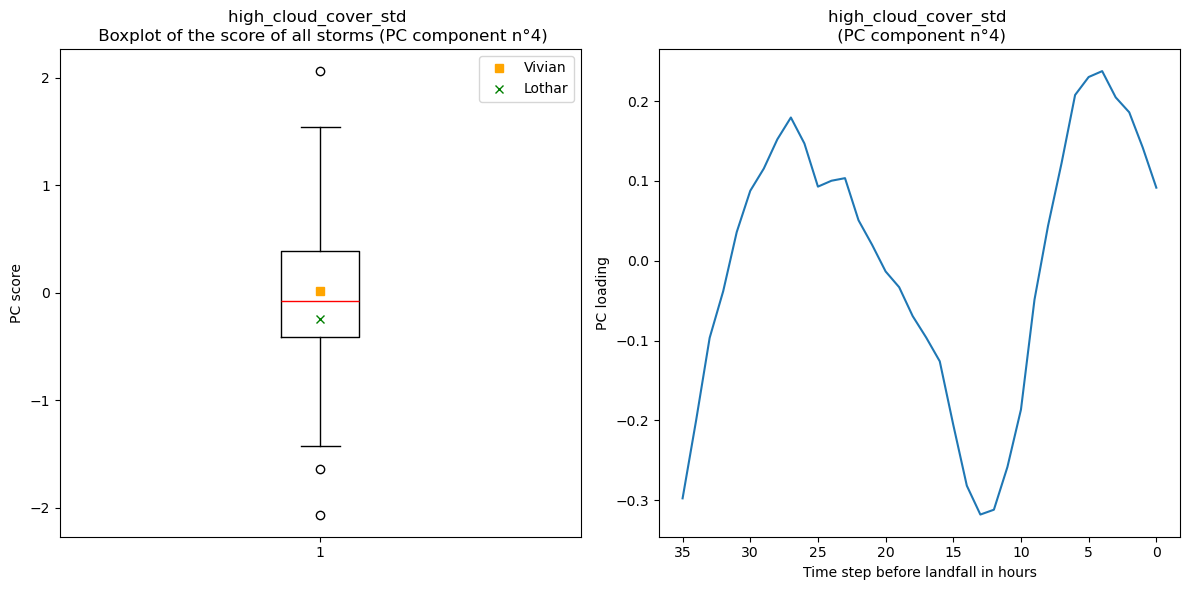

/var/folders/01/5ryz4pnn581dj9gk6r1nn5qr0000gn/T/ipykernel_3162/3202794770.py:3: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  pc_n = int(var_selected[var_selected['var_name'] == var]['PC'])+1


In [4]:
for var in var_selected['var_name']:
    var_pca = var_selected[var_selected['var_name']==var]['var_name_pca'].values[0]
    pc_n = int(var_selected[var_selected['var_name'] == var]['PC'])+1
    if pc_n > 5:
        continue

    temp_scores = eigenvectors[var]
    temp_loadings = loadings_all[var_pca]

    fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # Two subplots horizontally

    # plot the boxplot of the loadings for all storms
    axes[0].set_title(f'{var} \n Boxplot of the score of all storms (PC component n°{pc_n})')
    axes[0].boxplot(temp_loadings, medianprops = dict(color='red'))#scatter(temp_loadings.index.to_numpy(), temp_loadings)
    axes[0].set_ylabel('PC score')
    axes[0].plot(1, temp_loadings.loc[5], color='orange', marker='s', label='Vivian', linestyle='none') # temp_loadings.index.get_loc(5)
    axes[0].plot(1, temp_loadings.loc[38], color='green', marker='x', label='Lothar', linestyle='none') #temp_loadings.index.get_loc(38)
    axes[0].legend()

    # plot the scores for the PC component
    axes[1].plot(temp_scores)
    axes[1].set_title(f'{var} \n (PC component n°{pc_n})')
    axes[1].set_xlabel('Time step before landfall in hours')
    # flip the axes so that the time goes from left to right with last step on the right
    axes[1].invert_xaxis()
    axes[1].set_ylabel('PC loading')
    axes[1].set_xticklabels(np.arange(-5,40,5))

    plt.tight_layout()
    #plt.savefig(f'analysis_loadings_selected/figures/{folder}/{var}_{pc_n}.png', dpi=300)
    plt.show()

/var/folders/01/5ryz4pnn581dj9gk6r1nn5qr0000gn/T/ipykernel_3162/1391955350.py:13: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  pc_n = int(var_selected[var_selected['var_name'] == var]['PC']) + 1
/var/folders/01/5ryz4pnn581dj9gk6r1nn5qr0000gn/T/ipykernel_3162/1391955350.py:46: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  pc_n = int(var_selected[var_selected['var_name'] == var]['PC']) + 1


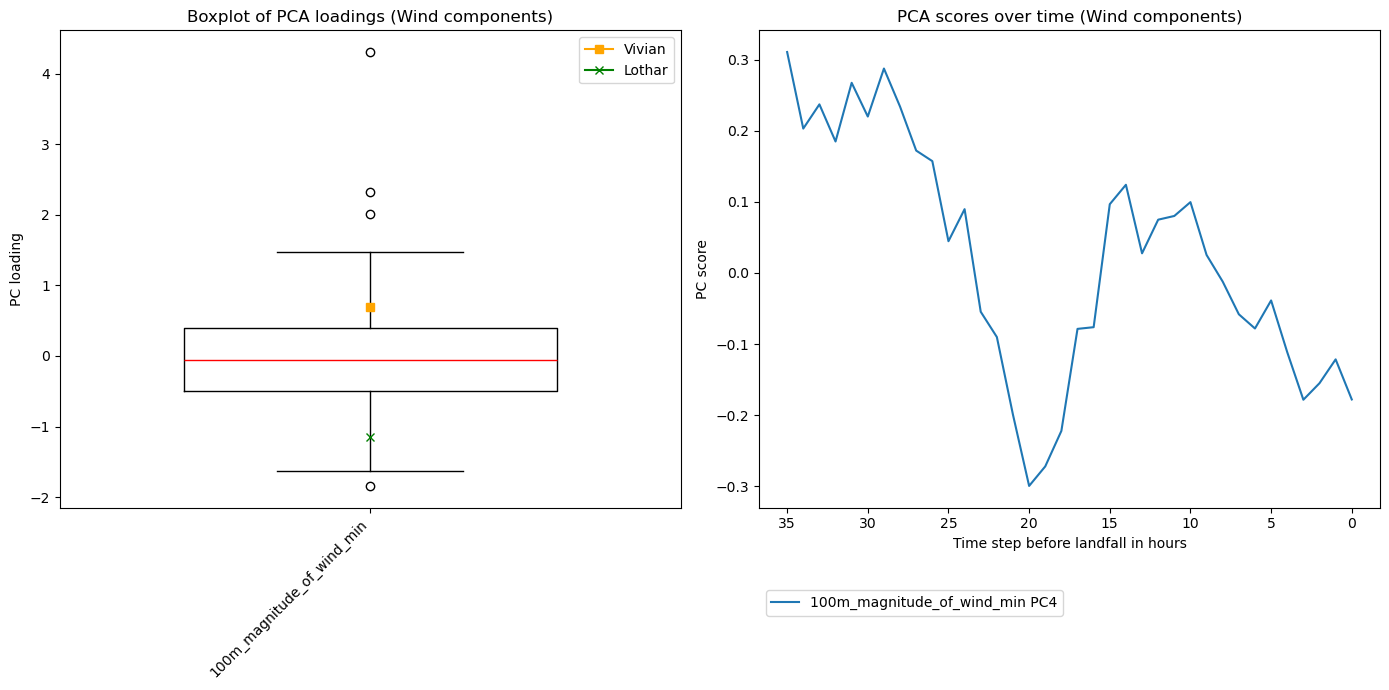

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Initialize lists for storing variables and their data
selected_vars = []
all_scores = {}
all_loadings = {}

# Collect variables and data meeting the conditions
for var in var_selected['var_name']:
    # Apply conditions: starts with '1' and PC number ≤ 5

    pc_n = int(var_selected[var_selected['var_name'] == var]['PC']) + 1

    if not var.startswith('1') or pc_n > 5:
        continue

    var_pca = var_selected[var_selected['var_name'] == var]['var_name_pca'].values[0]

    # Store the variable, scores, and loadings
    selected_vars.append(var)
    all_scores[var] = eigenvectors[var]
    all_loadings[var] = loadings_all[var_pca]

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(14, 7))  # Two subplots horizontally

# Boxplot of loadings for all selected variables
axes[0].set_title('Boxplot of PCA loadings (Wind components)')
for var in selected_vars:
    var_pca = var_selected[var_selected['var_name'] == var]['var_name_pca'].values[0]
    temp_loadings = all_loadings[var]
    axes[0].boxplot(temp_loadings, positions=[selected_vars.index(var)], widths=0.6, medianprops=dict(color='red'))
    # Highlight specific storms if required
    axes[0].plot(selected_vars.index(var), temp_loadings.loc[5], color='orange', marker='s', label='Vivian' if var == selected_vars[0] else "")
    axes[0].plot(selected_vars.index(var), temp_loadings.loc[38], color='green', marker='x', label='Lothar' if var == selected_vars[0] else "")

axes[0].set_xticks(range(len(selected_vars)))
axes[0].set_xticklabels(selected_vars, rotation=45, ha='right')
axes[0].set_ylabel('PC loading')
axes[0].legend()

# Line plot of PCA scores for all selected variables
axes[1].set_title('PCA scores over time (Wind components)')
for var in selected_vars:
    pc_n = int(var_selected[var_selected['var_name'] == var]['PC']) + 1
    temp_scores = all_scores[var]
    axes[1].plot(temp_scores, label=f'{var} PC{pc_n}')

axes[1].invert_xaxis()  # Flip axes for time representation
axes[1].set_xlabel('Time step before landfall in hours')
axes[1].set_ylabel('PC score')
axes[1].legend(loc='center left', bbox_to_anchor=(0, -0.2))

plt.tight_layout()
plt.savefig(f'analysis_loadings_selected/figures/wind_components{final}.png', dpi=300)
plt.show()

/var/folders/01/5ryz4pnn581dj9gk6r1nn5qr0000gn/T/ipykernel_3162/3108669487.py:12: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  pc_n = int(var_selected[var_selected['var_name'] == var]['PC']) + 1
/var/folders/01/5ryz4pnn581dj9gk6r1nn5qr0000gn/T/ipykernel_3162/3108669487.py:43: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  pc_n = int(var_selected[var_selected['var_name'] == var]['PC']) + 1


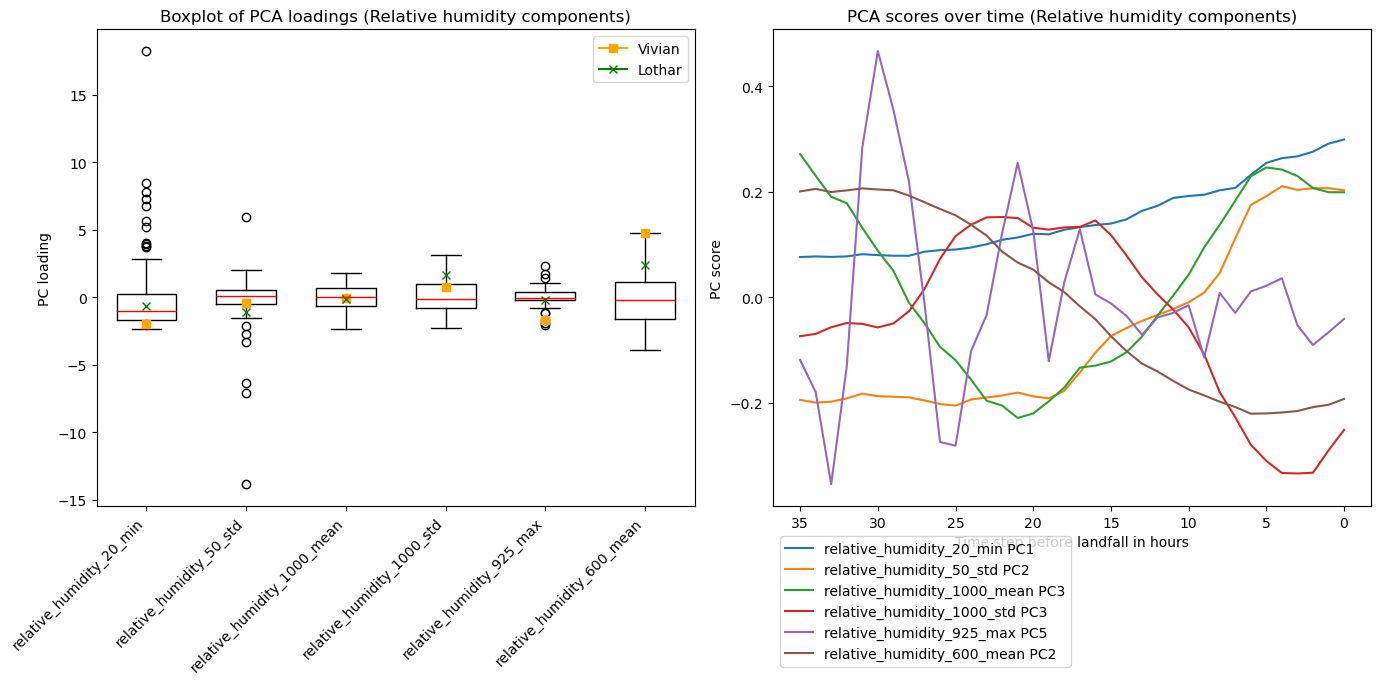

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Initialize lists for storing variables and their data
selected_vars = []
all_scores = {}
all_loadings = {}

# Collect variables and data meeting the conditions
for var in var_selected['var_name']:
    var_pca = var_selected[var_selected['var_name'] == var]['var_name_pca'].values[0]
    pc_n = int(var_selected[var_selected['var_name'] == var]['PC']) + 1

    # Apply conditions: starts with '1' and PC number ≤ 5
    if not var.startswith('relative') or pc_n > 5:
        continue

    # Store the variable, scores, and loadings
    selected_vars.append(var)
    all_scores[var] = eigenvectors[var]
    all_loadings[var] = loadings_all[var_pca]

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(14, 7))  # Two subplots horizontally

# Boxplot of loadings for all selected variables
axes[0].set_title('Boxplot of PCA loadings (Relative humidity components)')
for var in selected_vars:
    temp_loadings = all_loadings[var]
    axes[0].boxplot(temp_loadings, positions=[selected_vars.index(var)], widths=0.6, medianprops=dict(color='red'))
    # Highlight specific storms if required
    axes[0].plot(selected_vars.index(var), temp_loadings.loc[5], color='orange', marker='s', label='Vivian' if var == selected_vars[0] else "")
    axes[0].plot(selected_vars.index(var), temp_loadings.loc[38], color='green', marker='x', label='Lothar' if var == selected_vars[0] else "")

axes[0].set_xticks(range(len(selected_vars)))
axes[0].set_xticklabels(selected_vars, rotation=45, ha='right')
axes[0].set_ylabel('PC loading')
axes[0].legend()

# Line plot of PCA scores for all selected variables
axes[1].set_title('PCA scores over time (Relative humidity components)')
for var in selected_vars:
    pc_n = int(var_selected[var_selected['var_name'] == var]['PC']) + 1
    temp_scores = all_scores[var]
    axes[1].plot(temp_scores, label=f'{var} PC{pc_n}')

axes[1].invert_xaxis()  # Flip axes for time representation
axes[1].set_xlabel('Time step before landfall in hours')
axes[1].set_ylabel('PC score')
axes[1].legend(loc='center left', bbox_to_anchor=(0, -0.2))

plt.tight_layout()
plt.savefig(f'analysis_loadings_selected/figures/relative_humidity_components{final}.png', dpi=300)
plt.show()

/var/folders/01/5ryz4pnn581dj9gk6r1nn5qr0000gn/T/ipykernel_3162/4059306552.py:12: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  pc_n = int(var_selected[var_selected['var_name'] == var]['PC']) + 1
/var/folders/01/5ryz4pnn581dj9gk6r1nn5qr0000gn/T/ipykernel_3162/4059306552.py:43: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  pc_n = int(var_selected[var_selected['var_name'] == var]['PC']) + 1


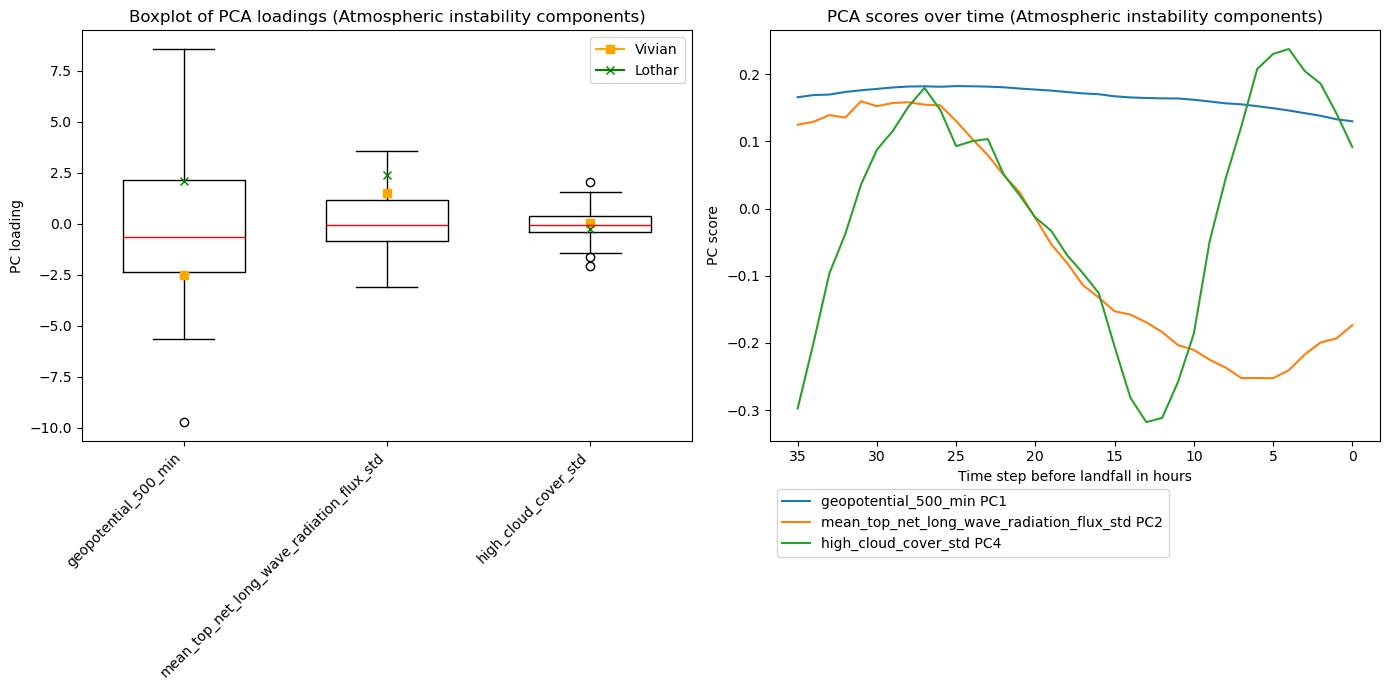

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Initialize lists for storing variables and their data
selected_vars = []
all_scores = {}
all_loadings = {}

# Collect variables and data meeting the conditions
for var in var_selected['var_name']:
    var_pca = var_selected[var_selected['var_name'] == var]['var_name_pca'].values[0]
    pc_n = int(var_selected[var_selected['var_name'] == var]['PC']) + 1

    # Apply conditions: starts with '1' and PC number ≤ 5
    if not (var.startswith('mean_top') or var.startswith('geop') or  var.startswith('high_')) or pc_n > 5:
        continue

    # Store the variable, scores, and loadings
    selected_vars.append(var)
    all_scores[var] = eigenvectors[var]
    all_loadings[var] = loadings_all[var_pca]

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(14, 7))  # Two subplots horizontally

# Boxplot of loadings for all selected variables
axes[0].set_title('Boxplot of PCA loadings (Atmospheric instability components)')
for var in selected_vars:
    temp_loadings = all_loadings[var]
    axes[0].boxplot(temp_loadings, positions=[selected_vars.index(var)], widths=0.6, medianprops=dict(color='red'))
    # Highlight specific storms if required
    axes[0].plot(selected_vars.index(var), temp_loadings.loc[5], color='orange', marker='s', label='Vivian' if var == selected_vars[0] else "")
    axes[0].plot(selected_vars.index(var), temp_loadings.loc[38], color='green', marker='x', label='Lothar' if var == selected_vars[0] else "")

axes[0].set_xticks(range(len(selected_vars)))
axes[0].set_xticklabels(selected_vars, rotation=45, ha='right')
axes[0].set_ylabel('PC loading')
axes[0].legend()

# Line plot of PCA scores for all selected variables
axes[1].set_title('PCA scores over time (Atmospheric instability components)')
for var in selected_vars:
    pc_n = int(var_selected[var_selected['var_name'] == var]['PC']) + 1
    temp_scores = all_scores[var]
    axes[1].plot(temp_scores, label=f'{var} PC{pc_n}')

axes[1].invert_xaxis()  # Flip axes for time representation
axes[1].set_xlabel('Time step before landfall in hours')
axes[1].set_ylabel('PC score')
axes[1].legend(loc='center left', bbox_to_anchor=(0, -0.2))

plt.tight_layout()
plt.savefig(f'analysis_loadings_selected/figures/atmospheric_instability_components{final}.png', dpi=300)
plt.show()

/var/folders/01/5ryz4pnn581dj9gk6r1nn5qr0000gn/T/ipykernel_3162/1054270095.py:12: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  pc_n = int(var_selected[var_selected['var_name'] == var]['PC']) + 1
/var/folders/01/5ryz4pnn581dj9gk6r1nn5qr0000gn/T/ipykernel_3162/1054270095.py:43: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  pc_n = int(var_selected[var_selected['var_name'] == var]['PC']) + 1


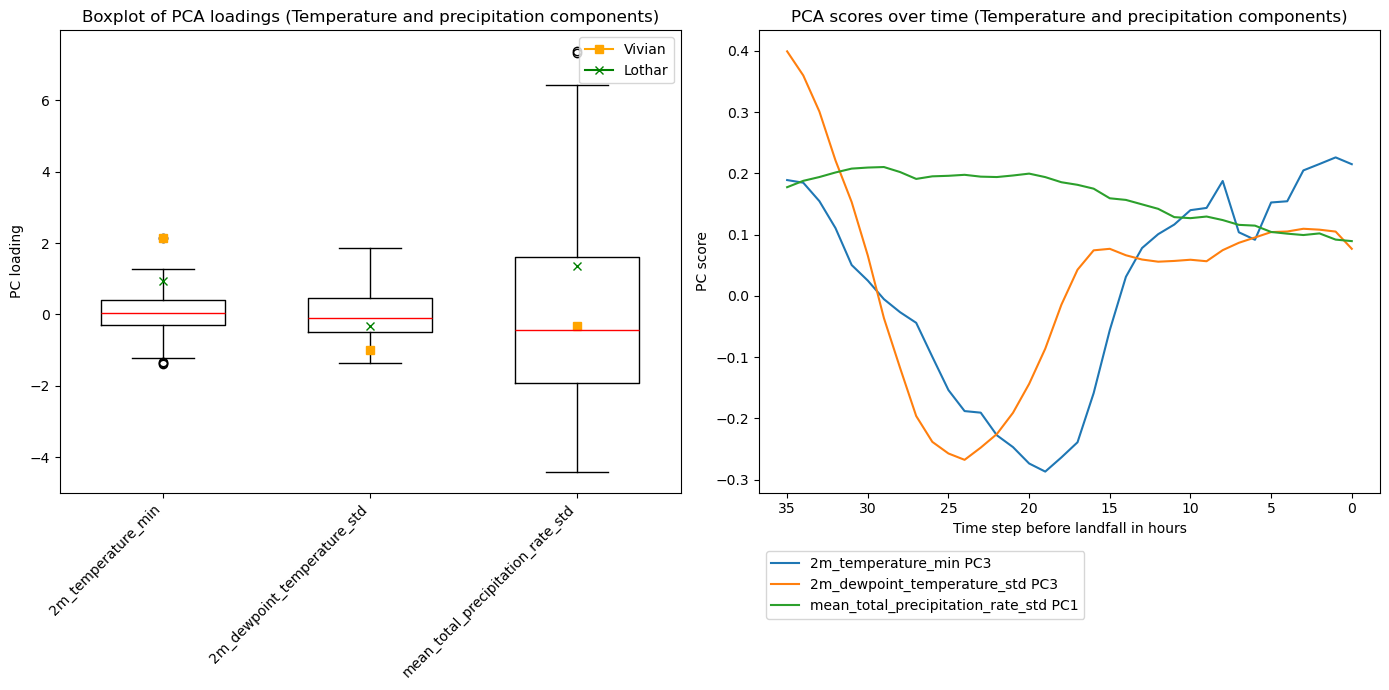

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Initialize lists for storing variables and their data
selected_vars = []
all_scores = {}
all_loadings = {}

# Collect variables and data meeting the conditions
for var in var_selected['var_name']:
    var_pca = var_selected[var_selected['var_name'] == var]['var_name_pca'].values[0]
    pc_n = int(var_selected[var_selected['var_name'] == var]['PC']) + 1

    # Apply conditions: starts with '1' and PC number ≤ 5
    if not (var.startswith('2m') or var.startswith('mean_total')) or pc_n > 5:
        continue

    # Store the variable, scores, and loadings
    selected_vars.append(var)
    all_scores[var] = eigenvectors[var]
    all_loadings[var] = loadings_all[var_pca]

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(14, 7))  # Two subplots horizontally

# Boxplot of loadings for all selected variables
axes[0].set_title('Boxplot of PCA loadings (Temperature and precipitation components)')
for var in selected_vars:
    temp_loadings = all_loadings[var]
    axes[0].boxplot(temp_loadings, positions=[selected_vars.index(var)], widths=0.6, medianprops=dict(color='red'))
    # Highlight specific storms if required
    axes[0].plot(selected_vars.index(var), temp_loadings.loc[5], color='orange', marker='s', label='Vivian' if var == selected_vars[0] else "")
    axes[0].plot(selected_vars.index(var), temp_loadings.loc[38], color='green', marker='x', label='Lothar' if var == selected_vars[0] else "")

axes[0].set_xticks(range(len(selected_vars)))
axes[0].set_xticklabels(selected_vars, rotation=45, ha='right')
axes[0].set_ylabel('PC loading')
axes[0].legend()

# Line plot of PCA scores for all selected variables
axes[1].set_title('PCA scores over time (Temperature and precipitation components)')
for var in selected_vars:
    pc_n = int(var_selected[var_selected['var_name'] == var]['PC']) + 1
    temp_scores = all_scores[var]
    axes[1].plot(temp_scores, label=f'{var} PC{pc_n}')

axes[1].invert_xaxis()  # Flip axes for time representation
axes[1].set_xlabel('Time step before landfall in hours')
axes[1].set_ylabel('PC score')
axes[1].legend(loc='center left', bbox_to_anchor=(0, -0.2))

plt.tight_layout()
plt.savefig(f'analysis_loadings_selected/figures/temperature_precipitation_components{final}.png', dpi=300)
plt.show()

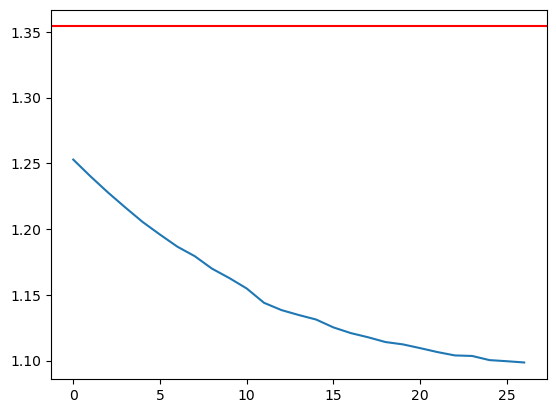

In [67]:
# plot the mean climatology and compare the RMSE from the selected PCA

mean_climatology_RMSE = 1.354
mean_linear_RMSE = loadings_selected_cdf['val_rmse']

plt.plot(mean_linear_RMSE, label='linear regression')
plt.axhline(y=mean_climatology_RMSE, color='r', linestyle='-', label='mean climatology')

AttributeError: 'numpy.float64' object has no attribute 'values'

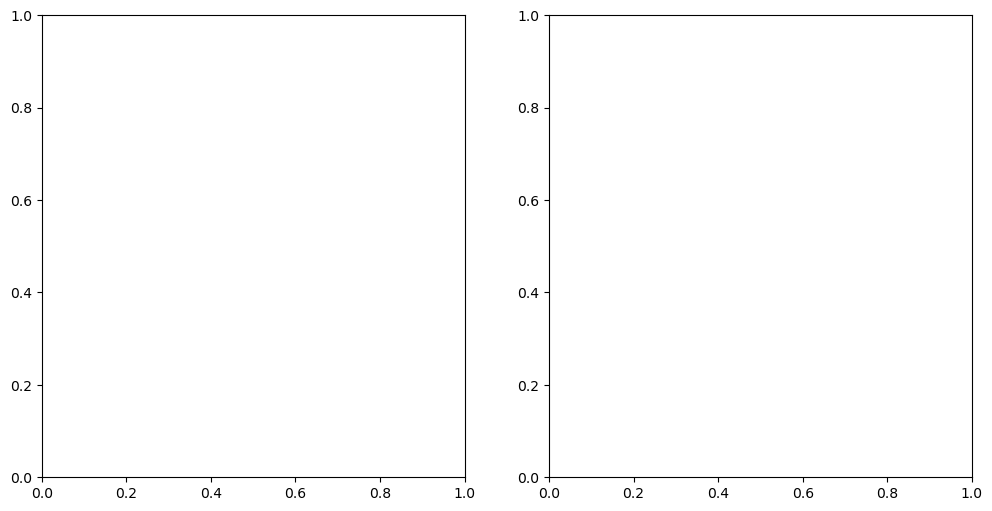

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# ----------------------------------
# 1. Create figure and subplots once
# ----------------------------------
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Lists to accumulate data for boxplots
all_box_data = []
var_labels = []

# (Optional) keep track of Vivian and Lothar indices
vivian_idx = 5
lothar_idx = 38

# ---------------------------------------------
# 2. Loop over variables, collect data & plot
# ---------------------------------------------
for var in var_selected['var_name']:
    var_pca = var_selected[var_selected['var_name']==var]['var_name_pca'].values[0]

    # Example filter: skip if variable name doesn't match
    if not (var.startswith('convective') or var.startswith('total_total')): #or var.startswith('geopotential')):
        continue
    
    pc_str = var_selected[var_selected['var_name'] == var]['PC'].values[0]  # e.g. "PC2"
    pc_n = pc_str#int(pc_str.split('PC')[1])
    if pc_n > 5:
        continue
    
    # (A) Extract the *loadings* for this variable and this PC
    temp_loadings = loadings_all[var_pca]
    var_pc = temp_loadings.iloc[pc_n-1]  # The row corresponding to PC_n
    
    # Accumulate in a list for boxplot
    # (we convert var_pc to numpy or list if needed)
    all_box_data.append(var_pc.values)  
    var_labels.append(f"{var}\nPC{pc_n}")
    
    # (B) Extract the *scores* for this variable and this PC
    temp_scores = eigenvectors[var]
    var_score_pc = temp_scores[f'PCA_{pc_n}']
    
    # Plot the PC score in the second subplot
    axes[1].plot(
        var_score_pc, 
        label=f"{var} (PC{pc_n})"
    )

# --------------------------------------------------
# 3. After the loop, plot ALL boxplots at the same time
# --------------------------------------------------
# By default, boxplot expects a list of arrays/lists
bplot = axes[0].boxplot(all_box_data, labels=var_labels, patch_artist=True, medianprops = dict(color='red'))

# You can optionally style your boxplots:
for patch in bplot['boxes']:
    patch.set(facecolor='lightblue')

axes[0].set_title('Boxplots of PC loadings for all selected variables')
axes[0].set_ylabel('PC scores')
axes[0].set_xticklabels(var_labels, rotation=45)

# --------------------------------------------------
# 4. Mark Vivian & Lothar in the boxplots
# --------------------------------------------------
# Because we have multiple boxes (one per var), we have to
# specify x-position of each box. By default: 1..N.
for i, box_data in enumerate(all_box_data, start=1):
    # i is the box position
    if vivian_idx < len(box_data):
        axes[0].plot(i, box_data[vivian_idx], color='orange',
                     marker='s', linestyle='none')
    if lothar_idx < len(box_data):
        axes[0].plot(i, box_data[lothar_idx], color='green',
                     marker='x', linestyle='none')

# -----------------------------------
# 5. Finish up the score (line) plot
# -----------------------------------
axes[1].set_title('PC scores (on CAPE and TT_index)')
axes[1].set_xlabel('Time step before landfall in hours')
axes[1].set_ylabel('PC loading')
# flip x-axis
axes[1].invert_xaxis()
# optionally change tick labels
axes[1].set_xticklabels(np.arange(-5,40,5))
# set the legend outside the plot
axes[1].legend(loc='center left', bbox_to_anchor=(0, -0.3))
#axes[1].legend()

plt.tight_layout()
plt.show()

/var/folders/01/5ryz4pnn581dj9gk6r1nn5qr0000gn/T/ipykernel_1316/1666139268.py:87: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(np.arange(-5,40,5))


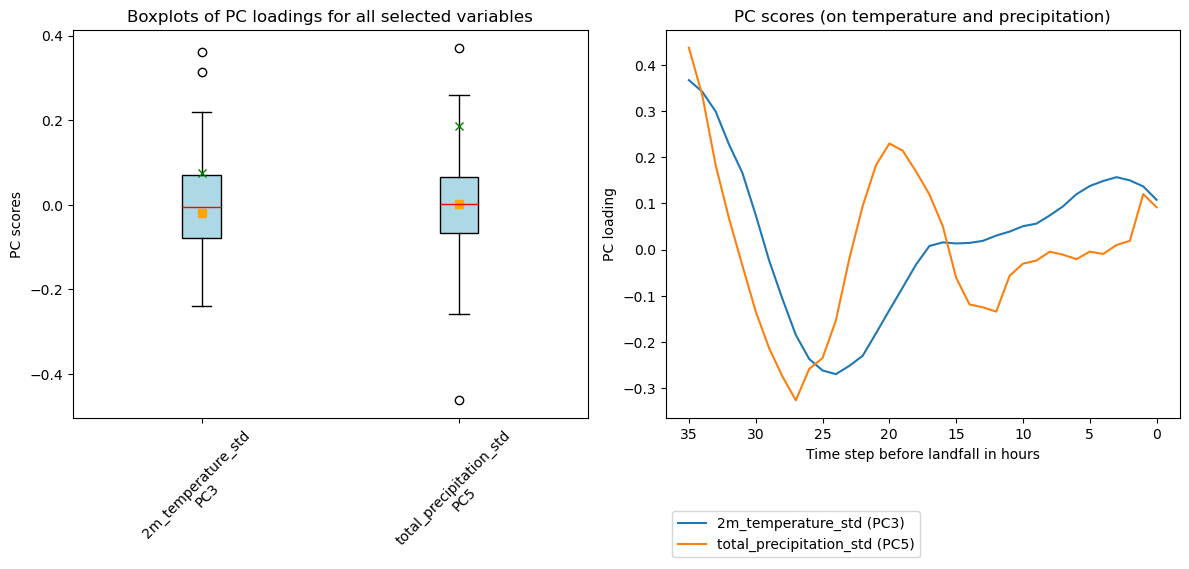

In [81]:
import matplotlib.pyplot as plt
import numpy as np

# ----------------------------------
# 1. Create figure and subplots once
# ----------------------------------
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Lists to accumulate data for boxplots
all_box_data = []
var_labels = []

# (Optional) keep track of Vivian and Lothar indices
vivian_idx = 5
lothar_idx = 38

# ---------------------------------------------
# 2. Loop over variables, collect data & plot
# ---------------------------------------------
for var in selected_output['var_name']:
    
    # Example filter: skip if variable name doesn't match
    if not (var.startswith('2') or var.startswith('total_p')): #or var.startswith('geopotential')):
        continue
    
    pc_str = selected_output[selected_output['var_name'] == var]['PC'].values[0]  # e.g. "PC2"
    pc_n = int(pc_str.split('PC')[1])
    if pc_n > 5:
        continue
    
    # (A) Extract the *loadings* for this variable and this PC
    temp_loadings = loadings_selected[var]
    var_pc = temp_loadings.iloc[pc_n-1]  # The row corresponding to PC_n
    
    # Accumulate in a list for boxplot
    # (we convert var_pc to numpy or list if needed)
    all_box_data.append(var_pc.values)  
    var_labels.append(f"{var}\nPC{pc_n}")
    
    # (B) Extract the *scores* for this variable and this PC
    temp_scores = scores_selected[var]
    var_score_pc = temp_scores[f'PCA_{pc_n}']
    
    # Plot the PC score in the second subplot
    axes[1].plot(
        var_score_pc, 
        label=f"{var} (PC{pc_n})"
    )

# --------------------------------------------------
# 3. After the loop, plot ALL boxplots at the same time
# --------------------------------------------------
# By default, boxplot expects a list of arrays/lists
bplot = axes[0].boxplot(all_box_data, labels=var_labels, patch_artist=True, medianprops = dict(color='red'))

# You can optionally style your boxplots:
for patch in bplot['boxes']:
    patch.set(facecolor='lightblue')

axes[0].set_title('Boxplots of PC loadings for all selected variables')
axes[0].set_ylabel('PC scores')
axes[0].set_xticklabels(var_labels, rotation=45)

# --------------------------------------------------
# 4. Mark Vivian & Lothar in the boxplots
# --------------------------------------------------
# Because we have multiple boxes (one per var), we have to
# specify x-position of each box. By default: 1..N.
for i, box_data in enumerate(all_box_data, start=1):
    # i is the box position
    if vivian_idx < len(box_data):
        axes[0].plot(i, box_data[vivian_idx], color='orange',
                     marker='s', linestyle='none')
    if lothar_idx < len(box_data):
        axes[0].plot(i, box_data[lothar_idx], color='green',
                     marker='x', linestyle='none')

# -----------------------------------
# 5. Finish up the score (line) plot
# -----------------------------------
axes[1].set_title('PC scores (on temperature and precipitation)')
axes[1].set_xlabel('Time step before landfall in hours')
axes[1].set_ylabel('PC loading')
# flip x-axis
axes[1].invert_xaxis()
# optionally change tick labels
axes[1].set_xticklabels(np.arange(-5,40,5))
# set the legend outside the plot
axes[1].legend(loc='center left', bbox_to_anchor=(0, -0.3))
#axes[1].legend()

plt.tight_layout()
plt.show()

/var/folders/01/5ryz4pnn581dj9gk6r1nn5qr0000gn/T/ipykernel_1316/914569866.py:87: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(np.arange(-5,40,5))


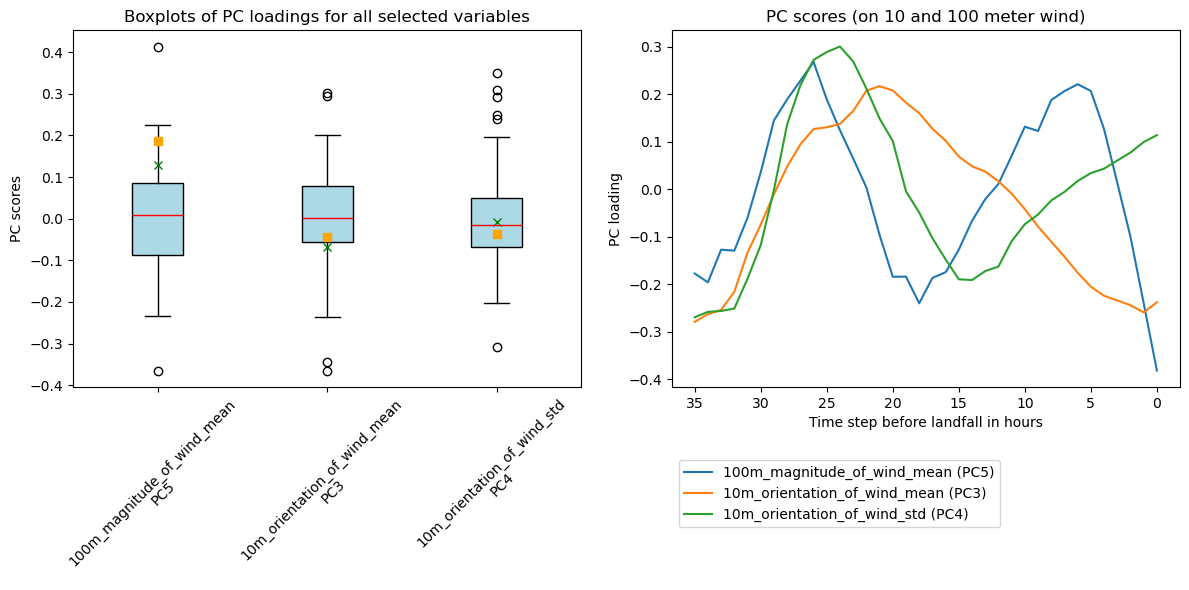

In [82]:
import matplotlib.pyplot as plt
import numpy as np

# ----------------------------------
# 1. Create figure and subplots once
# ----------------------------------
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Lists to accumulate data for boxplots
all_box_data = []
var_labels = []

# (Optional) keep track of Vivian and Lothar indices
vivian_idx = 5
lothar_idx = 38

# ---------------------------------------------
# 2. Loop over variables, collect data & plot
# ---------------------------------------------
for var in selected_output['var_name']:
    
    # Example filter: skip if variable name doesn't match
    if not (var.startswith('10')):# or var.startswith('total_p')): #or var.startswith('geopotential')):
        continue
    
    pc_str = selected_output[selected_output['var_name'] == var]['PC'].values[0]  # e.g. "PC2"
    pc_n = int(pc_str.split('PC')[1])
    if pc_n > 5:
        continue
    
    # (A) Extract the *loadings* for this variable and this PC
    temp_loadings = loadings_selected[var]
    var_pc = temp_loadings.iloc[pc_n-1]  # The row corresponding to PC_n
    
    # Accumulate in a list for boxplot
    # (we convert var_pc to numpy or list if needed)
    all_box_data.append(var_pc.values)  
    var_labels.append(f"{var}\nPC{pc_n}")
    
    # (B) Extract the *scores* for this variable and this PC
    temp_scores = scores_selected[var]
    var_score_pc = temp_scores[f'PCA_{pc_n}']
    
    # Plot the PC score in the second subplot
    axes[1].plot(
        var_score_pc, 
        label=f"{var} (PC{pc_n})"
    )

# --------------------------------------------------
# 3. After the loop, plot ALL boxplots at the same time
# --------------------------------------------------
# By default, boxplot expects a list of arrays/lists
bplot = axes[0].boxplot(all_box_data, labels=var_labels, patch_artist=True, medianprops = dict(color='red'))

# You can optionally style your boxplots:
for patch in bplot['boxes']:
    patch.set(facecolor='lightblue')

axes[0].set_title('Boxplots of PC loadings for all selected variables')
axes[0].set_ylabel('PC scores')
axes[0].set_xticklabels(var_labels, rotation=45)

# --------------------------------------------------
# 4. Mark Vivian & Lothar in the boxplots
# --------------------------------------------------
# Because we have multiple boxes (one per var), we have to
# specify x-position of each box. By default: 1..N.
for i, box_data in enumerate(all_box_data, start=1):
    # i is the box position
    if vivian_idx < len(box_data):
        axes[0].plot(i, box_data[vivian_idx], color='orange',
                     marker='s', linestyle='none')
    if lothar_idx < len(box_data):
        axes[0].plot(i, box_data[lothar_idx], color='green',
                     marker='x', linestyle='none')

# -----------------------------------
# 5. Finish up the score (line) plot
# -----------------------------------
axes[1].set_title('PC scores (on 10 and 100 meter wind)')
axes[1].set_xlabel('Time step before landfall in hours')
axes[1].set_ylabel('PC loading')
# flip x-axis
axes[1].invert_xaxis()
# optionally change tick labels
axes[1].set_xticklabels(np.arange(-5,40,5))
# set the legend outside the plot
axes[1].legend(loc='center left', bbox_to_anchor=(0, -0.3))
#axes[1].legend()

plt.tight_layout()
plt.show()

/var/folders/01/5ryz4pnn581dj9gk6r1nn5qr0000gn/T/ipykernel_1316/1210736605.py:87: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(np.arange(-5,40,5))


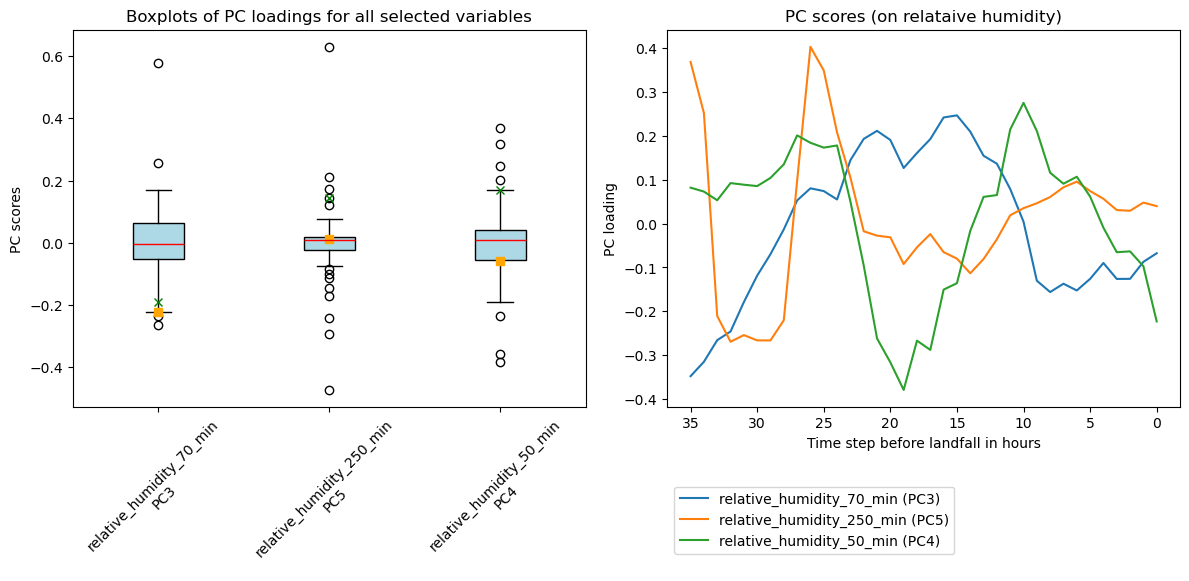

In [83]:
import matplotlib.pyplot as plt
import numpy as np

# ----------------------------------
# 1. Create figure and subplots once
# ----------------------------------
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Lists to accumulate data for boxplots
all_box_data = []
var_labels = []

# (Optional) keep track of Vivian and Lothar indices
vivian_idx = 5
lothar_idx = 38

# ---------------------------------------------
# 2. Loop over variables, collect data & plot
# ---------------------------------------------
for var in selected_output['var_name']:
    
    # Example filter: skip if variable name doesn't match
    if not (var.startswith('rel')):# or var.startswith('total_p')): #or var.startswith('geopotential')):
        continue
    
    pc_str = selected_output[selected_output['var_name'] == var]['PC'].values[0]  # e.g. "PC2"
    pc_n = int(pc_str.split('PC')[1])
    if pc_n > 5:
        continue
    
    # (A) Extract the *loadings* for this variable and this PC
    temp_loadings = loadings_selected[var]
    var_pc = temp_loadings.iloc[pc_n-1]  # The row corresponding to PC_n
    
    # Accumulate in a list for boxplot
    # (we convert var_pc to numpy or list if needed)
    all_box_data.append(var_pc.values)  
    var_labels.append(f"{var}\nPC{pc_n}")
    
    # (B) Extract the *scores* for this variable and this PC
    temp_scores = scores_selected[var]
    var_score_pc = temp_scores[f'PCA_{pc_n}']
    
    # Plot the PC score in the second subplot
    axes[1].plot(
        var_score_pc, 
        label=f"{var} (PC{pc_n})"
    )

# --------------------------------------------------
# 3. After the loop, plot ALL boxplots at the same time
# --------------------------------------------------
# By default, boxplot expects a list of arrays/lists
bplot = axes[0].boxplot(all_box_data, labels=var_labels, patch_artist=True, medianprops = dict(color='red'))

# You can optionally style your boxplots:
for patch in bplot['boxes']:
    patch.set(facecolor='lightblue')

axes[0].set_title('Boxplots of PC loadings for all selected variables')
axes[0].set_ylabel('PC scores')
axes[0].set_xticklabels(var_labels, rotation=45)

# --------------------------------------------------
# 4. Mark Vivian & Lothar in the boxplots
# --------------------------------------------------
# Because we have multiple boxes (one per var), we have to
# specify x-position of each box. By default: 1..N.
for i, box_data in enumerate(all_box_data, start=1):
    # i is the box position
    if vivian_idx < len(box_data):
        axes[0].plot(i, box_data[vivian_idx], color='orange',
                     marker='s', linestyle='none')
    if lothar_idx < len(box_data):
        axes[0].plot(i, box_data[lothar_idx], color='green',
                     marker='x', linestyle='none')

# -----------------------------------
# 5. Finish up the score (line) plot
# -----------------------------------
axes[1].set_title('PC scores (on relataive humidity)')
axes[1].set_xlabel('Time step before landfall in hours')
axes[1].set_ylabel('PC loading')
# flip x-axis
axes[1].invert_xaxis()
# optionally change tick labels
axes[1].set_xticklabels(np.arange(-5,40,5))
# set the legend outside the plot
axes[1].legend(loc='center left', bbox_to_anchor=(0, -0.3))
#axes[1].legend()

plt.tight_layout()
plt.show()